In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_1 = np.random.normal((0,0), 0.6, size=(150, 2))
data_1[:5]

array([[ 0.18619368, -0.14799843],
       [-1.03251873, -1.42452961],
       [ 0.12526427, -0.09857594],
       [ 0.40393655,  0.89739909],
       [-0.38290125,  0.30384478]])

In [3]:
data_2 = np.random.normal((2,1), 0.2, size=(25, 2))
data_2[:5]

array([[1.84197207, 0.75998203],
       [2.08398928, 1.03857155],
       [2.06555775, 1.00057418],
       [2.08500364, 0.82926749],
       [1.70661893, 0.64812981]])

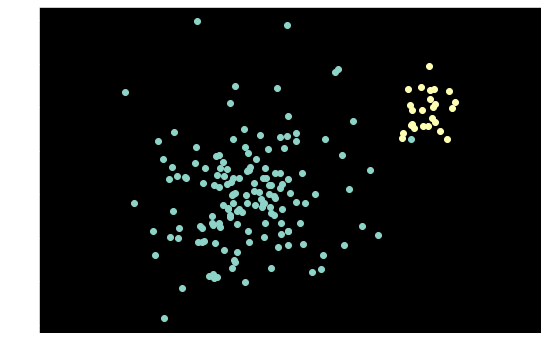

In [4]:
plt.figure(figsize=(9,6))
plt.style.use('dark_background')
plt.axis('equal')

plt.scatter(*data_1.T)
plt.scatter(*data_2.T)
plt.show()

In [5]:
data = np.vstack([data_1, data_2])
membership = np.random.choice([1,2,3], size=len(data))
clusters = {1:None, 2:None, 3: None}
cluster_weight = {c:1 for c in clusters}

In [6]:
def update_clusters(data, membership, clusters):
    clu = {}
    for c in clusters:
        members = [v for v,m in zip(data, membership) if m==c]
        if members:
            clu[c] = np.array(members).mean(axis=0)
    return clu

In [7]:
clusters = update_clusters(data, membership, clusters)
clusters

{1: array([0.2874915 , 0.14633556]),
 2: array([0.27084132, 0.10507554]),
 3: array([0.1286574 , 0.17148419])}

In [8]:
def show(data, membership, clusters):
    plt.figure(figsize=(9,6))
    plt.style.use('dark_background')
    plt.axis('equal')
    
    for c in clusters:
        
        plt.scatter(*np.array([v for v,m in zip(data, membership) if m==c]).T)
        x,y = clusters[c]
        plt.plot(x, y, 'ro')
        
    plt.show()

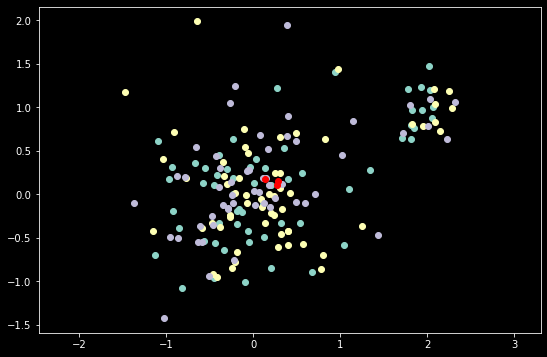

In [9]:
show(data, membership, clusters)

In [10]:
def update_membership(data, membership, clusters, cluster_weight):
    for i in range(len(data)):
        f_max = 0
        membership[i] = 0
        
        for c in clusters:
            d = np.linalg.norm(data[i] - clusters[c]) + 0.0001
            f = cluster_weight[c] / d**2
            if f > f_max:
                f_max = f
                membership[i] = c
            

In [11]:
def update_cluster_weight(membership, clusters, cluster_weight):
    cluster_weight = {}
    for c in clusters:
        w = sum(1 for m in membership if m==c)
        if w > 2:
            cluster_weight[c] = w**1.2
        else:
            cluster_weight[c] = 0
    return cluster_weight
    

In [12]:
update_membership(data, membership, clusters, cluster_weight)
cluster_weight = update_cluster_weight(membership, clusters, cluster_weight)

In [13]:
membership

array([2, 3, 2, 1, 3, 3, 3, 3, 1, 3, 1, 2, 3, 3, 2, 2, 3, 3, 1, 3, 2, 3,
       1, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
       2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 1, 3, 3, 3, 2, 3, 3, 2, 3, 3,
       1, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 1, 3,
       1, 3, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3,
       2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 1, 1,
       3, 1, 3, 3, 3, 3, 3, 1, 2, 2, 3, 3, 3, 3, 1, 2, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
cluster_weight

{1: 96.35073157522456, 2: 76.18019304970512, 3: 230.23934350492604}

{1: 66.40743836382342, 2: 49.88477498225796, 3: 300.1577678713944}
{1: 52.19591521315758, 2: 23.733054843014095, 3: 356.88291540784064}
{1: 49.88477498225796, 2: 6.898648307306074, 3: 389.07649109393657}
{1: 49.88477498225796, 2: 0, 3: 398.8235562351439}
{1: 49.88477498225796, 2: 0, 3: 405.34378834292806}
{1: 49.88477498225796, 3: 405.34378834292806}
{1: 49.88477498225796, 3: 405.34378834292806}
{1: 49.88477498225796, 3: 405.34378834292806}
{1: 49.88477498225796, 3: 405.34378834292806}
{1: 49.88477498225796, 3: 405.34378834292806}


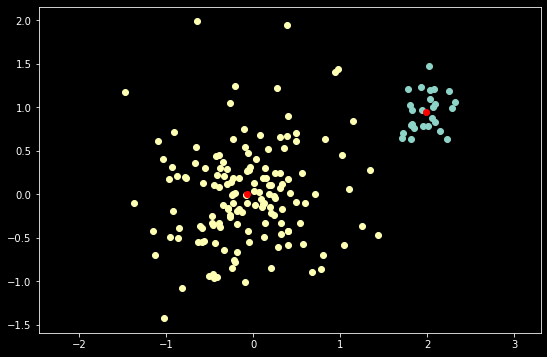

In [15]:
for _ in range(10):
    clusters = update_clusters(data, membership, clusters)
    update_membership(data, membership, clusters, cluster_weight)
    cluster_weight = update_cluster_weight(membership, clusters, cluster_weight)
    print(cluster_weight)

show(data, membership, clusters)